# Part 1: Option Valuation

## Ex. 1: Binomial tree program to approximate the price of the option. 
How does your estimate compare to the analytical value? <br>
Experiment for different values of the volatility

In [28]:
import math

stock_price = 100.0
strike_price = 99.0
interest_rate = 0.06
volatility = 0.20
steps = 50 

d = math.exp(-volatility * math.sqrt(1/steps))
u  = math.exp(volatility * math.sqrt(1/steps))
a = math.exp(interest_rate * 1/steps )
p = (a - d) / (u - d)

def binomial_tree(steps, start):
    ''' Binomial tree to approximate the price of the option ''' 
    # Result includes stock price, option price, delta
    results = [[[start, 0, 0]]]
    
    for i in range(steps): 
        result = []
        for j in range(len(results[-1])):
            if j == 0:
                result.append([results[-1][j][0] * d, 0, 0])
            result.append([results[-1][j][0] * u, 0, 0])
        results.append(result)  
   
    return results


def call_option(S, K):
    ''' Calculates the value of a call option at its expiration date '''
    return max(0, S - K)

def risk_neutral_valuation(r, dt, fi, fj): 
    ''' Risk-neutral valuation of the option '''
    return math.exp(-r * dt) * (p * fi + (1 - p)*fj)

def price_call(treelist, strike_price):
    lentree = len(treelist)
    for el in treelist[-1]:
        el[1] = call_option(el[0], strike_price)
        
    for j in range(lentree - 1):
        for k in range(len(treelist[-(j+2)])):
            treelist[-(j+2)][k][1] = risk_neutral_valuation(interest_rate, 1/steps, treelist[-(j+1)][k][1], treelist[-(j+1)][k+1][1])
#             if j == 0 and k ==0:
#                 print(treelist[-(j+1)][k][1], treelist[-(j+1)][k+1][1], treelist[-(j+2)][k][1])
    return treelist

def calc_delta(treelist):
    lentree = len(treelist)
        
    for j in range(lentree - 1):
        for k in range(len(treelist[-(j+2)])):
            treelist[-(j+2)][k][2] = (treelist[-(j+1)][k][1] - treelist[-(j+1)][k+1][1]) / (treelist[-(j+1)][k][0] - treelist[-(j+1)][k+1][0])
#             if j == 0 and k ==0:
#                 print(treelist[-(j+1)][k][1], treelist[-(j+1)][k+1][1], treelist[-(j+2)][k][1])
    return treelist


In [29]:
''' The estimate compared to the analytical value '''
#The estimate 
treelist = binomial_tree(steps, stock_price)
filled_tree = price_call(treelist, strike_price)
print(filled_tree[0][0][1])

#The analytical value


6.9413989712433875


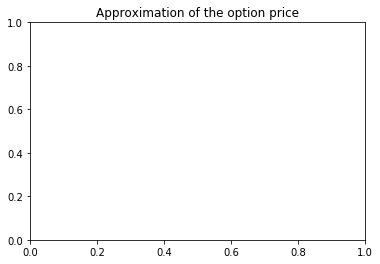

In [30]:
''' Different values of volatility '''
import matplotlib.pyplot as plt

plt.figure()
plt.title('Approximation of the option price')
plt.show()

## Ex. 2: Convergence of the method
What is the computational complexity of this algorithm? <br>
Done

## Ex. 3: Hedge parameter
Compare with the analytical values. 
Experiment for different values of the volatility.

In [31]:
better_tree = calc_delta(filled_tree)
print(better_tree[0])

[[100.0, 6.9413989712433875, 0.48108165285175314]]


## Ex. 4: American option 
What is the value of the American put and call for the corresponding parameters? <br>
Experiment for different values of the volatility.

In [ ]:
d1 = 

# Part 2: Hedging Simulations

In [ ]:
# T = 1

stock_price = 100.0
strike_price = 99.0
interest_rate = 1.06
volatility = 0.20

def dynamics_stock_price(r, S, dt, sigma, dZ):
    return r*S*dt + sigma * S * dZ

